# *Grupo3 SRL*

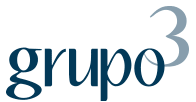

# Final 4º Bimestre Diplomatura UADE 

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

### *Representantes comerciales*

Nombre y Apellido | LU


---


### Indice

1. __<a href='#0' target='_self'>Objetivos del notebook</a>__
1. __<a href='#1' target='_self'>Importamos Librerías</a>__
1. __<a href='#2' target='_self'>Preparamos los Tweets</a>__
    1. __<a href='#2A' target='_self'>Accedemos a la base datos y colección de tweets</a>__
        1. <a href='#2Aa' target='_self'>Desde MongoDB</a>    
        1. <a href='#2Ab' target='_self'>Primer limpieza del dataset</a>
    1. __<a href='#2B' target='_self'>Seleccionamos el grupo de tweets de interés</a>__
        1. <a href='#2Ba' target='_self'>Creamos el subconjunto de Tweets en un nuevo df</a>
        1. <a href='#2Bb' target='_self'>Identificamos a los distintos participantes y agregamos un campo con sus etiquetas</a>
1. __<a href='#3' target='_self'>Preprocesamiento de los Tweets</a>__
   1. __<a href='#3a' target='_self'>Sacamos los # hashtags</a>__
   1. __<a href='#3b' target='_self'>Sacamos los signos de puntuación</a>__
   1. __<a href='#3c' target='_self'>Tokenización</a>__
   1. __<a href='#3d' target='_self'>Stop Words</a>__
   1. __<a href='#3e' target='_self'>Stematización</a>__
        
1. __<a href='#4' target='_self'>4. Procesamiento de Lenguaje Natural (NLP)</a>__
     1. __<a href='#4a' target='_self'>Análisis de Sentimientos</a>__

## <a id='0'>Objetivos del notebook</a>
- Importar los datos de la base de datos MongoDB al final de cada día
- Realizar el preprocesamiento de los datos
- Realizar el tratamiento de sentimientos a través de la librería SentimentIntensityAnalyzer (SIA)
- Exportar los datos a un csv

## <a id='1'>1. Importamos las Librerías</a>

In [183]:
from datetime import datetime
now_i = datetime.now()

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
%matplotlib inline
import datetime

# Para tomar el archivo de MongDB
import os
import pymongo
from pymongo import MongoClient
import urllib.parse
from pandas.io.json import json_normalize
from PIL import Image

# Trabajando con NLP sobre texto
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from pandarallel import pandarallel
from nltk.tokenize import RegexpTokenizer
from wordcloud import STOPWORDS

# Para identificar sentimientos sobre text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# Ignorar los warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Bajamos el stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("spanish"))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ri1965/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ri1965/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ri1965/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ri1965/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ri1965/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /Users/ri1965/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/ri1965/nltk_data...
[nltk_data]   Package conll2000 is al

## <a id='2'>2. Preparamos los Tweets</a>
### <a id='2A'>A. Accedemos a la base datos y collección de tweets</a>
a. __<a id='2Aa'>Desde MongoDB</a>__

In [103]:
fecha = '2022/11/20'
numero = fecha.replace('/', '')

In [104]:
username = urllib.parse.quote_plus('root')
password = urllib.parse.quote_plus('root')

client = MongoClient('mongodb://localhost:27017')
db = client.twitter
collection = db[f'data{fecha}']

In [105]:
datapoints = list(collection.find({}))

In [106]:
tweets_df = pd.json_normalize(datapoints)

In [6]:
# Archivo .csv como copia de lo que se extrae de MongoDB
tweets_df.to_csv('/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/raw/csv_MongoDB/twitter_raw'+numero+'.csv')

In [107]:
tweets_df.head(5)

_id                              matching_rules  \
0  638969c662eb8502b8d20fe7  [{'id': '1590927576431837185', 'tag': ''}]   
1  638969c662eb8502b8d20fe8  [{'id': '1590927576431837185', 'tag': ''}]   
2  638969c662eb8502b8d20fe9  [{'id': '1590927576431837185', 'tag': ''}]   
3  638969c662eb8502b8d20fea  [{'id': '1594438770060836865', 'tag': ''}]   
4  638969c662eb8502b8d20feb  [{'id': '1590927576431837185', 'tag': ''}]   

                  fecha data.edit_history_tweet_ids              data.id  \
0  2022/11/20, 19:10:10       [1594444555843428352]  1594444555843428352   
1  2022/11/20, 19:10:10       [1594444555163779079]  1594444555163779079   
2  2022/11/20, 19:10:10       [1594444556791054339]  1594444556791054339   
3  2022/11/20, 19:10:10       [1594444557193687040]  1594444557193687040   
4  2022/11/20, 19:10:10       [1594444556518531074]  1594444556518531074   

                                           data.text  
0  RT @healthy_pockets: 🔥RETO🔥\n\nPara terminar l...  
1          @KriptoZorro Umarım artık düzelir her şey  
2  @cz_binance @fildias Make back your FTX losses...  
3  RT @unidosxmarcos: Qué bronca me da esto, cero...  
4  @0xEthereumYoda WallStreetBets Group, announce...

In [108]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216598 entries, 0 to 216597
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   _id                          216598 non-null  object
 1   matching_rules               216598 non-null  object
 2   fecha                        216598 non-null  object
 3   data.edit_history_tweet_ids  216595 non-null  object
 4   data.id                      216598 non-null  object
 5   data.text                    216598 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


b. __<a id='2Ab'>Primer limpeza del dataset</a>__

In [109]:
# Cambiamos nombre de columna data.text
tweets_df = tweets_df.rename(columns={'data.text': 'text'})

In [110]:
tweets_df.sample(10)

_id  \
71988   638969c762eb8502b8d3291b   
174040  638969c762eb8502b8d4b7bf   
106347  638969c762eb8502b8d3af52   
8706    638969c662eb8502b8d231e9   
168683  638969c762eb8502b8d4a2d2   
146111  638969c762eb8502b8d44aa6   
96128   638969c762eb8502b8d38767   
161316  638969c762eb8502b8d4860b   
85895   638969c762eb8502b8d35f6e   
132513  638969c762eb8502b8d41588   

                                           matching_rules  \
71988   [{'id': '1594443192535056386', 'tag': ''}, {'i...   
174040         [{'id': '1594438770060836865', 'tag': ''}]   
106347         [{'id': '1594443192535056386', 'tag': ''}]   
8706           [{'id': '1590927576431837185', 'tag': ''}]   
168683         [{'id': '1590927576431837185', 'tag': ''}]   
146111         [{'id': '1594438770060836865', 'tag': ''}]   
96128   [{'id': '1594443192535056386', 'tag': ''}, {'i...   
161316         [{'id': '1594438770060836865', 'tag': ''}]   
85895          [{'id': '1594438770060836865', 'tag': ''}]   
132513         [{'id': '1594438770060836865', 'tag': ''}]   

                       fecha data.edit_history_tweet_ids              data.id  \
71988   2022/11/20, 20:32:55       [1594510676487114752]  1594510676487114752   
174040  2022/11/20, 22:37:10       [1594533667417858048]  1594533667417858048   
106347  2022/11/20, 21:18:25       [1594521146287964160]  1594521146287964160   
8706    2022/11/20, 19:18:45       [1594449196056072194]  1594449196056072194   
168683  2022/11/20, 22:31:40       [1594532083229233153]  1594532083229233153   
146111  2022/11/20, 21:58:15       [1594527367032086529]  1594527367032086529   
96128   2022/11/20, 20:57:15       [1594514830467207169]  1594514830467207169   
161316  2022/11/20, 22:24:25       [1594530209449054208]  1594530209449054208   
85895   2022/11/20, 20:46:50       [1594513417771122688]  1594513417771122688   
132513  2022/11/20, 21:44:35       [1594525536348667905]  1594525536348667905   

                                                     text  
71988   RT @loumylight_: Juliana y la tora: \n#Gh22 #G...  
174040  @xccGHx mejor perderla, que te la metan por atrás  
106347  RT @LaRomiScalora: Cada vez que Juliana dice "...  
8706    claimed mine @DemetriosDolios @olegnekras777 @...  
168683  Spadki ciąg dalszy. Ciekawe kiedy nastąpi etap...  
146111  RT @cotisapucai: con esos 34% si queda en plac...  
96128                         Para vos CORNUDA @FDoficial  
161316  @fedeandrada1905 Un asco esa churreria👀😳 dice ...  
85895   RT @itsmeluga: El Alfa en la cena mientras se ...  
132513  RT @Lenalaughs_: LA COMUNIDAD DE TWITTER LO HI...

In [111]:
# Creamos un df para trabajas sólo con la columna text
tweets_df2 = pd.DataFrame(tweets_df[['text', 'fecha']])

In [112]:
tweets_df2.sample(10)

text  \
126157  RT @world_lyp: Que pajaaaaa una semana más esc...   
213531               @SJosephBurns and what do you think?   
173610  RT @CastelarSa: Deseo una placa con Juliana, M...   
18409   @Jayecane $sissie2347a1...cash app and tip jar...   
73450   RT @PablaLunar: la forma que tiene de hablar j...   
77312   Que se vaya Juliana que ya no la soporto #Gran...   
175252  RT @CristianUGH22: Seguramente se quede julian...   
113947  RT @patricioogodoy: Fuertísimo escuchar a Juli...   
109254  RT @danimiya: La semana que viene \n\n#GH22 #G...   
60259     Promote it on @NFTsSaga https://t.co/WgHGxpk8cT   

                       fecha  
126157  2022/11/20, 21:38:15  
213531  2022/11/20, 00:00:00  
173610  2022/11/20, 22:36:40  
18409   2022/11/20, 19:28:30  
73450   2022/11/20, 20:34:30  
77312   2022/11/20, 20:38:25  
175252  2022/11/20, 22:38:20  
113947  2022/11/20, 21:25:55  
109254  2022/11/20, 21:21:20  
60259   2022/11/20, 20:21:20

In [113]:
# Ponemos los tweets en minúsculas
tweets_df2['text'] = tweets_df2['text'].str.lower()

In [114]:
tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216598 entries, 0 to 216597
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    216598 non-null  object
 1   fecha   216598 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [115]:
# Sacamos los '@names' de los tweets
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [116]:
# Empezamos a limpiar los mensajes, conservamos el original y las modificaciones las pasamos a una columna nueva.
tweets_df2['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df2['text'], "@[\w]*")
tweets_df2.head(10)

text                 fecha  \
0  rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1          @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2  @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3  rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4  @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   
5  @bahbs71 @ministerofnfts it is also complicate...  2022/11/20, 19:10:10   
6  slnd5 treasury is paying @abybandit111\n @jero...  2022/11/20, 19:10:10   
7  ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
8                 @giftlovej https://t.co/5oyaoebbvo  2022/11/20, 19:10:10   
9   @stockmoneyl pump or dump…\nthat's the question.  2022/11/20, 19:10:10   

                                         tidy_tweets  
0  rt : 🔥reto🔥\n\npara terminar la semana a tope ...  
1                       umarım artık düzelir her şey  
2    make back your ftx losses, from this before ...  
3  rt : qué bronca me da esto, cero consideración...  
4   wallstreetbets group, announced a massive sig...  
5    it is also complicated to accept the true na...  
6  slnd5 treasury is paying \n \n \n \n \n \n \n ...  
7  ay pero señora q le pasa???? xq habla asi???? ...  
8                            https://t.co/5oyaoebbvo  
9                pump or dump…\nthat's the question.

In [117]:
# Sacamos los 'http/https' de los tweets
tweets_limpios = []

for index, row in tweets_df2.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if ('http' or 'https:') not in word]
    tweets_limpios.append(' '.join(words_without_links))

tweets_df2['tidy_tweets'] = tweets_limpios
tweets_df2.head(10)
# Mirar registro nº 8 que ahora quedó vacio

text                 fecha  \
0  rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1          @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2  @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3  rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4  @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   
5  @bahbs71 @ministerofnfts it is also complicate...  2022/11/20, 19:10:10   
6  slnd5 treasury is paying @abybandit111\n @jero...  2022/11/20, 19:10:10   
7  ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
8                 @giftlovej https://t.co/5oyaoebbvo  2022/11/20, 19:10:10   
9   @stockmoneyl pump or dump…\nthat's the question.  2022/11/20, 19:10:10   

                                         tidy_tweets  
0  rt : 🔥reto🔥 para terminar la semana a tope 🥳 l...  
1                       umarım artık düzelir her şey  
2  make back your ftx losses, from this before it...  
3  rt : qué bronca me da esto, cero consideración...  
4  wallstreetbets group, announced a massive sign...  
5  it is also complicated to accept the true natu...  
6                           slnd5 treasury is paying  
7  ay pero señora q le pasa???? xq habla asi???? ...  
8                                                     
9                 pump or dump… that's the question.

In [118]:
# Sacamos los 'rt :' de los tweets
tweets_df2['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df2['tidy_tweets'], "rt :*")
tweets_df2.head(10)

text                 fecha  \
0  rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1          @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2  @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3  rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4  @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   
5  @bahbs71 @ministerofnfts it is also complicate...  2022/11/20, 19:10:10   
6  slnd5 treasury is paying @abybandit111\n @jero...  2022/11/20, 19:10:10   
7  ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
8                 @giftlovej https://t.co/5oyaoebbvo  2022/11/20, 19:10:10   
9   @stockmoneyl pump or dump…\nthat's the question.  2022/11/20, 19:10:10   

                                         tidy_tweets  
0   🔥reto🔥 para terminar la semana a tope 🥳 la pe...  
1                       umarım artık düzelir her şey  
2  make back your ftx losses, from this before it...  
3   qué bronca me da esto, cero consideración por...  
4  wallstreetbets group, announced a massive sign...  
5  it is also complicated to accept the true natu...  
6                           slnd5 treasury is paying  
7  ay pero señora q le pasa???? xq habla asi???? ...  
8                                                     
9                 pump or dump… that's the question.

In [119]:
# Sacamos los tweets vacios
tweets_df2 = tweets_df2[tweets_df2['tidy_tweets']!='']
tweets_df2.head(10)

text                 fecha  \
0   rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1           @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2   @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3   rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4   @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   
5   @bahbs71 @ministerofnfts it is also complicate...  2022/11/20, 19:10:10   
6   slnd5 treasury is paying @abybandit111\n @jero...  2022/11/20, 19:10:10   
7   ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
9    @stockmoneyl pump or dump…\nthat's the question.  2022/11/20, 19:10:10   
10  bitcoin prediction result\n\nsell 0.182 btc fo...  2022/11/20, 19:10:10   

                                          tidy_tweets  
0    🔥reto🔥 para terminar la semana a tope 🥳 la pe...  
1                        umarım artık düzelir her şey  
2   make back your ftx losses, from this before it...  
3    qué bronca me da esto, cero consideración por...  
4   wallstreetbets group, announced a massive sign...  
5   it is also complicated to accept the true natu...  
6                            slnd5 treasury is paying  
7   ay pero señora q le pasa???? xq habla asi???? ...  
9                  pump or dump… that's the question.  
10  bitcoin prediction result sell 0.182 btc for $...

In [120]:
# Sacamos los tweets duplicados
tweets_df2.drop_duplicates(subset=['tidy_tweets'], keep=False)
tweets_df2.head()

text                 fecha  \
0  rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1          @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2  @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3  rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4  @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   

                                         tidy_tweets  
0   🔥reto🔥 para terminar la semana a tope 🥳 la pe...  
1                       umarım artık düzelir her şey  
2  make back your ftx losses, from this before it...  
3   qué bronca me da esto, cero consideración por...  
4  wallstreetbets group, announced a massive sign...

In [121]:
# Reseteamos los índices
tweets_df2 = tweets_df2.reset_index(drop=True)
tweets_df2.head(10)

text                 fecha  \
0  rt @healthy_pockets: 🔥reto🔥\n\npara terminar l...  2022/11/20, 19:10:10   
1          @kriptozorro umarım artık düzelir her şey  2022/11/20, 19:10:10   
2  @cz_binance @fildias make back your ftx losses...  2022/11/20, 19:10:10   
3  rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
4  @0xethereumyoda wallstreetbets group, announce...  2022/11/20, 19:10:10   
5  @bahbs71 @ministerofnfts it is also complicate...  2022/11/20, 19:10:10   
6  slnd5 treasury is paying @abybandit111\n @jero...  2022/11/20, 19:10:10   
7  ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
8   @stockmoneyl pump or dump…\nthat's the question.  2022/11/20, 19:10:10   
9  bitcoin prediction result\n\nsell 0.182 btc fo...  2022/11/20, 19:10:10   

                                         tidy_tweets  
0   🔥reto🔥 para terminar la semana a tope 🥳 la pe...  
1                       umarım artık düzelir her şey  
2  make back your ftx losses, from this before it...  
3   qué bronca me da esto, cero consideración por...  
4  wallstreetbets group, announced a massive sign...  
5  it is also complicated to accept the true natu...  
6                           slnd5 treasury is paying  
7  ay pero señora q le pasa???? xq habla asi???? ...  
8                 pump or dump… that's the question.  
9  bitcoin prediction result sell 0.182 btc for $...

In [22]:
tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35032 entries, 0 to 35031
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         35032 non-null  object
 1   fecha        35032 non-null  object
 2   tidy_tweets  35032 non-null  object
dtypes: object(3)
memory usage: 821.2+ KB


In [23]:
# Este csv contiene la info antes de seleccionar los mensajes de interés
tweets_df2.to_csv(f'/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/twitter_raw{numero}.csv')

### <a id='2B'>B. Seleccionamos el grupo de tweets de interés</a>

Esta etapa sigue a la etapa anterior (limpieza de los mensaje de twitter).
Inluye:
- Crear una lista de palabras para seleccionar los tweets válidos
- Crear un nuevo df
- Crear un nuevo campo con el label de a qué participante se refiere el tweet y eliminar los que contengan más de un participante
- Resetear índice y guardar csv

a. __<a id='2Ba'>Creamos el subconjunto de Tweets en un nuevo df</a>__

In [122]:
# Creamos lista de palabras clave
hashtags = ["#granhermano2022", "#granhernano2022", "#granhermano", "#gh", "#gh22", "#gh2022", "#granhermanoargentina", "ghargentina"]

nombres = ["lucila", "juan ignacio", "belen", "walter", "mora", "maximiliano", "constanza", "maria laura", "agustin", 
           "tomas", "juan", "martina", "daniela", "julieta", "marcos", "thiago", "romina", "alexis", "juliana", "santiago"]

apellidos = ["castañares", "puente", "villar", "jabornisky", "guidici", "santiago", "romero", "alvarez", "guardis", "del moro", "delmoro"
             "holder", "reverdito", "stewart", "usher", "celis", "poggio", "ginocchio", "media", "uhrig", "quiroga", "diaz"]

apodos = ["nacho", "tora", "alfa", "maxi", "coti", "cata", "frodo", "dani", "pestañela", "disney", "primo", "conejo", "cone", "tini"]

otros = ["frodoneta", "nominado", "confesionario", "nominacion", "debate", "marculieta"]


In [123]:
# Creamos una lista que contenga todas las listas creadas
lista_palabras_clave = [hashtags, nombres, apellidos, apodos, otros]

In [124]:
# Se crea la variable lista_final que contiene los valores de cada una de las listas
lista_final =  []
for i in lista_palabras_clave:
    lista_final.extend(i)

In [125]:
# Creamos un df sólo con los tweets seleccionados 
tweets_df3 = tweets_df2[tweets_df2["tidy_tweets"].str.contains("|".join(lista_final))]

In [126]:
tweets_df3.reset_index()

index                                               text  \
0            3  rt @unidosxmarcos: qué bronca me da esto, cero...   
1            7  ay pero señora q le pasa???? xq habla asi???? ...   
2           22  nacho contando que una de las productoras le d...   
3           25                        quiero que se vacha juliana   
4           32  rt @gh_trivia: resultados parciales | #granher...   
...        ...                                                ...   
106932  213430  rt @cristianugh22: seguramente se quede julian...   
106933  213432  para mi que juliana odia a su familia y por es...   
106934  213436  rt @roochiitorres18: vamos argentina papaaaaaa...   
106935  213441  rt @desempleadagh22: marcos, el más disimulado...   
106936  213450                        @pepeochoa88 juliana de una   

                       fecha  \
0       2022/11/20, 19:10:10   
1       2022/11/20, 19:10:10   
2       2022/11/20, 19:10:10   
3       2022/11/20, 19:10:10   
4       2022/11/20, 19:10:10   
...                      ...   
106932  2022/11/20, 00:00:00   
106933  2022/11/20, 00:00:00   
106934  2022/11/20, 00:00:00   
106935  2022/11/20, 00:00:00   
106936  2022/11/20, 00:00:00   

                                              tidy_tweets  
0        qué bronca me da esto, cero consideración por...  
1       ay pero señora q le pasa???? xq habla asi???? ...  
2       nacho contando que una de las productoras le d...  
3                             quiero que se vacha juliana  
4        resultados parciales | #granhermano 1° lucila...  
...                                                   ...  
106932   seguramente se quede juliana, por ende si usa...  
106933  para mi que juliana odia a su familia y por es...  
106934   vamos argentina papaaaaaaa nada mas que decir...  
106935   marcos, el más disimulado por suerte 🤭 #gh22 ...  
106936                                     juliana de una  

[106937 rows x 4 columns]

In [128]:
# Sacamos los hashtags que usamos para crear la selección
tweets_df3['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df3['tidy_tweets'], "#[\w]*")
tweets_df3.head()

/var/folders/lv/nlwnvhb90677ltl8gcqnky9h0000gn/T/ipykernel_45250/2376204754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df3['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df3['tidy_tweets'], "#[\w]*")


text                 fecha  \
3   rt @unidosxmarcos: qué bronca me da esto, cero...  2022/11/20, 19:10:10   
7   ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
22  nacho contando que una de las productoras le d...  2022/11/20, 19:10:10   
25                        quiero que se vacha juliana  2022/11/20, 19:10:10   
32  rt @gh_trivia: resultados parciales | #granher...  2022/11/20, 19:10:10   

                                          tidy_tweets  
3    qué bronca me da esto, cero consideración por...  
7   ay pero señora q le pasa???? xq habla asi???? ...  
22  nacho contando que una de las productoras le d...  
25                        quiero que se vacha juliana  
32   resultados parciales |  1° lucila 80,64% 2° j...

In [129]:
tweets_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106937 entries, 3 to 213450
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         106937 non-null  object
 1   fecha        106937 non-null  object
 2   tidy_tweets  106937 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


b. __<a id='2Bb'>Identificamos a los distintos participantes y agregamos un campo con sus etiquetas</a>__ 

In [130]:
# Cargamos los tweets en una variable
tweets = tweets_df3[["tidy_tweets", 'fecha']]

In [131]:
# Creamos listas para todos los nombres posibles por participantes

lista_nacho = ['juan ignacio', 'castañares', 'nacho']

lista_lucila = ['lucila', 'villar', 'tora', ]

lista_alfa = ['walter', 'santiago', 'alfa']

lista_mora = ['mora', 'jabornisky']

lista_maxi = ['maxi', 'guidici', 'maximiliano']

lista_coti = ['constanza', 'coti', 'romero']

lista_cata = ['maria laura','laura', 'alvarez', 'cata']

lista_frodo = ['agustin', 'guardis', 'frodo', 'agustín']

lista_tomas = ['tomas', 'tomás', 'holder']

lista_juan = ['juan', 'reverdito']

lista_martina = ['matina', 'martina', 'stewart', 'usher']

lista_dany = ['dany', 'daniela', 'celis', 'pestañela', 'pestanela']

lista_disney = ['julieta', 'poggio', 'disney']

lista_marcos = ['marcos', 'ginocchio', 'primo']

lista_thiago = ['thiago', 'agustin', 'agustín', 'media']

lista_romina = ['romina', 'uhrig']

lista_alexis = ['alexis', 'conejo', 'cone', 'quiroga']

lista_juliana = ['juliana', 'diaz', 'tini']

In [132]:
# Creo una lista de tuplas

tuplas_participantes = [(lista_nacho, "ignacio"), (lista_lucila, "lucila"), (lista_alfa, "walter"), (lista_mora, "mora"), (lista_maxi, "maximiliano"), 
                        (lista_coti, "constanza"), (lista_cata, "maria laura"), (lista_frodo, "agustin"), (lista_tomas, "tomas"), 
                        (lista_juan, "juan"), (lista_martina, "martina"), (lista_dany, "daniela"), (lista_disney, "julieta"), (lista_marcos, "marcos"), 
                        (lista_thiago, "thiago"), (lista_romina, "romina"), (lista_alexis, "alexis"), (lista_juliana, "juliana")]

In [133]:
# Esta función crea variables numéricas para cada participantes según sus identificadores figuren en el mensaje
def participantes(dataframe, columna, lista_participante, participante):
    lista = []
    for i in dataframe[columna]:
        count_participante = 0
        for j in i.split():
            for each in lista_participante:
                if j == each:
                    count_participante = count_participante + 1
        if count_participante > 0:
            lista.append(1)
        else:
            lista.append(0)
    dataframe[participante] = lista
    
    return dataframe

In [134]:
for i,j in tuplas_participantes:
    participantes(tweets, "tidy_tweets", i, j)

In [135]:
tweets.head()

tidy_tweets                 fecha  \
3    qué bronca me da esto, cero consideración por...  2022/11/20, 19:10:10   
7   ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
22  nacho contando que una de las productoras le d...  2022/11/20, 19:10:10   
25                        quiero que se vacha juliana  2022/11/20, 19:10:10   
32   resultados parciales |  1° lucila 80,64% 2° j...  2022/11/20, 19:10:10   

    ignacio  lucila  walter  mora  maximiliano  constanza  maria laura  \
3         0       0       0     0            0          0            0   
7         0       0       0     0            0          0            0   
22        1       0       0     0            0          0            0   
25        0       0       0     0            0          0            0   
32        0       1       1     0            0          0            0   

    agustin  tomas  juan  martina  daniela  julieta  marcos  thiago  romina  \
3         0      0     0        0        0        0       1       0       0   
7         0      0     0        0        0        0       0       0       0   
22        0      0     0        0        0        0       0       0       0   
25        0      0     0        0        0        0       0       0       0   
32        0      0     0        0        0        0       0       0       0   

    alexis  juliana  
3        0        0  
7        0        0  
22       0        0  
25       0        1  
32       0        1

In [136]:
tweets.shape

(106937, 20)

In [137]:
tweets["suma_tweets"] = tweets.iloc[:, 2:].sum(axis = 1)

In [138]:
tweets.head()

tidy_tweets                 fecha  \
3    qué bronca me da esto, cero consideración por...  2022/11/20, 19:10:10   
7   ay pero señora q le pasa???? xq habla asi???? ...  2022/11/20, 19:10:10   
22  nacho contando que una de las productoras le d...  2022/11/20, 19:10:10   
25                        quiero que se vacha juliana  2022/11/20, 19:10:10   
32   resultados parciales |  1° lucila 80,64% 2° j...  2022/11/20, 19:10:10   

    ignacio  lucila  walter  mora  maximiliano  constanza  maria laura  \
3         0       0       0     0            0          0            0   
7         0       0       0     0            0          0            0   
22        1       0       0     0            0          0            0   
25        0       0       0     0            0          0            0   
32        0       1       1     0            0          0            0   

    agustin  ...  juan  martina  daniela  julieta  marcos  thiago  romina  \
3         0  ...     0        0        0        0       1       0       0   
7         0  ...     0        0        0        0       0       0       0   
22        0  ...     0        0        0        0       0       0       0   
25        0  ...     0        0        0        0       0       0       0   
32        0  ...     0        0        0        0       0       0       0   

    alexis  juliana  suma_tweets  
3        0        0            1  
7        0        0            0  
22       0        0            1  
25       0        1            1  
32       0        1            3  

[5 rows x 21 columns]

In [139]:
tweets_df4 = tweets[tweets["suma_tweets"] == 1].reset_index(drop = "first")

In [143]:
tweets_df4.suma_tweets.sum()

50363

In [144]:
# Creamos una columna con etiquetas de los participantes
for columna in tweets_df4.loc[:,'ignacio' : 'juliana'].columns:
    for indice in tweets_df4.index:
        if tweets_df4.loc[indice, columna] == 1:
            tweets_df4.loc[indice, "participante"] = columna


In [145]:
# Confirmamos haber creado en forma correcta la columna "participante"
tweets_df4.participante.unique()

array(['marcos', 'ignacio', 'juliana', 'alexis', 'lucila', 'thiago',
       'constanza', 'julieta', 'walter', 'agustin', 'romina',
       'maria laura', 'maximiliano', 'daniela', 'juan', 'martina', 'mora',
       'tomas'], dtype=object)

In [151]:
# Creamos una copia de tweets_df4
tweets_df5 = tweets_df4.copy()

In [152]:
tweets_df5.shape

(50363, 22)

In [153]:
# Borramos la columna suma_tweets que ya no nos sirve
tweets_df5.drop('suma_tweets', axis = 1, inplace = True)

## <a id='3'>3. Preprocesamiento de los tweets</a>

In [155]:
tweets_df5 = tweets_df5.reset_index(drop=True)
tweets_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50363 entries, 0 to 50362
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tidy_tweets   50363 non-null  object
 1   fecha         50363 non-null  object
 2   ignacio       50363 non-null  int64 
 3   lucila        50363 non-null  int64 
 4   walter        50363 non-null  int64 
 5   mora          50363 non-null  int64 
 6   maximiliano   50363 non-null  int64 
 7   constanza     50363 non-null  int64 
 8   maria laura   50363 non-null  int64 
 9   agustin       50363 non-null  int64 
 10  tomas         50363 non-null  int64 
 11  juan          50363 non-null  int64 
 12  martina       50363 non-null  int64 
 13  daniela       50363 non-null  int64 
 14  julieta       50363 non-null  int64 
 15  marcos        50363 non-null  int64 
 16  thiago        50363 non-null  int64 
 17  romina        50363 non-null  int64 
 18  alexis        50363 non-null  int64 
 19  juli

###  __<a id='3a'>A. Trabajamos los Emoticones</a>__

A la hora de analizar sentimientos los emoticones transmiten ciertas emociones que nos permitirían a suve clasificar dichos sentimientos

In [156]:
# Vemos los emoticones presentes
tweets_text = tweets_df5['tidy_tweets'].str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(4581, ': '),
 (3524, 'xi'),
 (176, 'xq'),
 (121, 'xa'),
 (90, 'xf'),
 (57, 'xd'),
 (36, ':c'),
 (25, ':p'),
 (20, ':"'),
 (18, ':('),
 (11, ':v'),
 (7, 'x2'),
 (5, 'xk'),
 (5, ':)'),
 (3, 'x3'),
 (2, 'xr'),
 (1, 'x…'),
 (1, 'x6'),
 (1, ':/')]

In [157]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(HAPPY_EMO, tweets_text)))
print("Sad emoticons:", set(re.findall(SAD_EMO, tweets_text)))

Happy emoticons: {':p', ':)', 'xd'}
Sad emoticons: {':/', ':('}


In [158]:
tweets_df5['tidier_tweets'] = tweets_df5['tidy_tweets'].str.replace(r'xd|:\)', 'alegre')

/var/folders/lv/nlwnvhb90677ltl8gcqnky9h0000gn/T/ipykernel_45250/10841489.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df5['tidier_tweets'] = tweets_df5['tidy_tweets'].str.replace(r'xd|:\)', 'alegre')


In [159]:
tweets_df5['tidier_tweets'] = tweets_df5['tidy_tweets'].str.replace(r':/', 'triste')

In [160]:
tweets_df5.shape

(50363, 22)

###  __<a id='3b'>B. Sacamos signos de puntuación</a>__

In [161]:
tweets_df5['tidiest_tweets'] = tweets_df5['tidier_tweets'].str.replace(r'[^\w\s]+', '')


/var/folders/lv/nlwnvhb90677ltl8gcqnky9h0000gn/T/ipykernel_45250/409197305.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df5['tidiest_tweets'] = tweets_df5['tidier_tweets'].str.replace(r'[^\w\s]+', '')


In [162]:
tweets_df5['tidiest_tweets'] 

0         qué bronca me da esto cero consideración por ...
1        nacho contando que una de las productoras le d...
2                              quiero que se vacha juliana
3         ya sabemos que nacho es dolobu chusma y juega...
4        que lo manden no más afuera tiene aguante y oj...
                               ...                        
50358    marian ingersoll michell hazlitt  harry julian...
50359    ulysses juliana leopold gus  jerry flynn  rock...
50360     daniela quiso hacer la espontánea pero gh le ...
50361    para mi que juliana odia a su familia y por es...
50362                                       juliana de una
Name: tidiest_tweets, Length: 50363, dtype: object

In [163]:
import unidecode

In [164]:
tweets_df5['tidiest2_tweets'] = tweets_df5['tidiest_tweets'].apply(lambda x: unidecode.unidecode(x))

In [165]:
tweets_df5['tidiest2_tweets'].sample(20)

4781     juliana tratando de escuchar algo para llevar ...
46667       juliana te lo juro por la salud de mi madre...
11147              juliana reconociendo todooo la odioooo 
29384                        coti en este momento opama   
27644    espero que no la cuiden a la tora produccion d...
2926                                   marcos te espera ju
49331    creo que marcos es el que mas dificil la va te...
16009                        deja a tu mama en paz juliana
15141       basta q pesada juliana jurando por su familia 
17342     juliana te lo juro mi mama la mama de juliana...
4559      desde afuera se ve que ayer juliana mintio un...
3534      no puedo dejar de pensar si san martin hablab...
46062     avisenle a coti que cuando sale de gh tiene q...
1851     cada vez que veo esto me da una bronca terribl...
17313                        deja a tu mama en paz juliana
29990                           chicos la cara de juliana 
32240      juliana basta de jurar por tu familia por fav

In [166]:
tweets_df5.shape

(50363, 24)

Las siguientes secciones son a modo ilustrativo de la forma de tratar los mensajes con el objetivo posterior de crear, por ejemplo, una nube de palabras. Para tal fin, ver el notebook `Final_Diplo_v3` 

###  __<a id='3c'>C. Tokenización</a>__

Significa separar la oración en palabras, proceso luego del cual corresponde sacar ciertas palabras para quedarse con otras.

In [167]:
tk = TweetTokenizer()
pandarallel.initialize(progress_bar=True)

tweets_df5["tokenized"] = tweets_df5["tidiest2_tweets"].parallel_apply(lambda x: tk.tokenize(x))

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [168]:
tweets_df5["tokenized"]

0        [que, bronca, me, da, esto, cero, consideracio...
1        [nacho, contando, que, una, de, las, productor...
2                        [quiero, que, se, vacha, juliana]
3        [ya, sabemos, que, nacho, es, dolobu, chusma, ...
4        [que, lo, manden, no, mas, afuera, tiene, agua...
                               ...                        
50358    [marian, ingersoll, michell, hazlitt, harry, j...
50359    [ulysses, juliana, leopold, gus, jerry, flynn,...
50360    [daniela, quiso, hacer, la, espontanea, pero, ...
50361    [para, mi, que, juliana, odia, a, su, familia,...
50362                                   [juliana, de, una]
Name: tokenized, Length: 50363, dtype: object

In [169]:
# Pasamos todo a una lista ('token')
tokens = [y for x in tweets_df5['tokenized'] for y in x]

In [170]:
#Verificar frecuencia de palabras 
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

que:25264
bronca:192
me:4107
da:616
esto:317
cero:24
consideracion:2
por:10564
el:7699
primo:139
nacho:1807
contando:76
una:2211
de:21372
las:2791
productoras:6
le:3235
dijo:681
su:2085
hija:212
lo:5186
conocia:7
y:8975
cortaron:15
2022:1028
argentina:439
quiero:859
se:15234
vacha:848
juliana:30589
ya:1833
sabemos:92
es:6200
dolobu:1
chusma:16
juega:74
horrible:26
pero:2349
hay:609
reconocerle:3
no:9538
bajo:40
del:1832
barco:9
chupando:3
medias:14
manden:20
mas:2549
afuera:543
tiene:2287
aguante:149
ojala:276
quede:253
con:4441
sacamos:192
a:17218
la:29239
mierda:330
conejo:132
sobre:109
thiago:359
estaba:259
mal:576
sentimentalmente:1
mi:2366
negro:407
levanto:14
cama:10
hice:11
desayuno:4
Shi:203
Jie:174
Bei:164
myra:24
crichton:10
samuel:26
henry:39
Ai:34
You:63
Xi:66
Ti:390
Yu:368
vicky:26
bobTi:14
rae:14
hewlett:8
lucila:3218
al:7402
9009:6268
0030hs:182
resumen:183
en:5662
vivo:297
don:25
sidney:23
charles:46
chester:9
toynbee:13
ives:16
sam:27
truda:14
doyle:8
ann:15
harvey:35


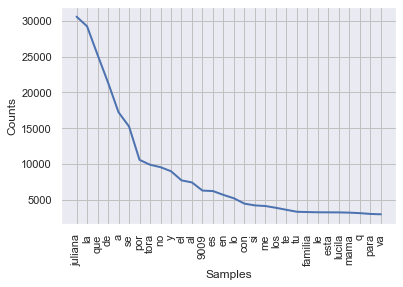

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [171]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

###  __<a id='3d'>D. Stop Words</a>__

In [172]:
STOPWORDS = STOPWORDS.union(set([
    " ", "a", "aaaaa", "actualmente", "adelante", "además", "afirmó", "agregó", "ahí", "ahora",
    "cc", "this", "pa", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l",
    "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "al",
    "algo", "algún", "algún", "alguna", "algunas", "alguno", "algunos",
    "alrededor", "ambos", "ampleamos", "añadió", "ante", "anterior", "antes",
    "apenas", "aproximadamente", "aquel", "aquellas", "aquellos", "aqui",
    "aquí", "arriba", "aseguró", "así", "atras", "aún", "aunque", "ayer",
    "bajo", "bastante", "bien", "buen", "buena", "buenas", "bueno", "buenos",
    "cada", "casi", "cerca", "cierta", "ciertas", "cierto", "ciertos", "cinco",
    "comentó", "como", "cómo", "con", "conocer", "conseguimos", "conseguir",
    "considera", "consideró", "consigo", "consigue", "consiguen", "consigues",
    "contra", "cosas", "creo", "cual", "cuales", "cualquier", "cuando",
    "cuanto", "cuatro", "cuenta", "da", "dado", "dan", "dar", "de", "debe",
    "deben", "debido", "decir", "dejó", "del", "demás", "dentro", "desde",
    "después", "dice", "dicen", "dicho", "dieron", "diferente", "diferentes",
    "dijeron", "dijo", "dio", "donde", "dos", "durante", "e", "ejemplo", "el",
    "de", "la", "el", "porfas", "t", "p", "d", "est",
    "él", "ella", "ellas", "ello", "ellos", "embargo", "empleais", "emplean",
    "emplear", "empleas", "empleo", "en", "encima", "encuentra", "entonces",
    "entre", "era", "eramos", "eran", "eras", "eres", "es", "esa", "esas",
    "ese", "eso", "esos", "esta", "ésta", "está", "estaba", "estaban",
    "estado", "estais", "estamos", "estan", "están", "estar", "estará",
    "estas", "éstas", "este", "éste", "esto", "estos", "éstos", "estoy",
    "estuvo", "ex", "existe", "existen", "explicó", "expresó", "fin", "fue",
    "fuera", "fueron", "fui", "fuimos", "gran", "grandes", "gueno", "ha",
    "haber", "había", "habían", "habrá", "hace", "haceis", "hacemos", "hacen",
    "hacer", "hacerlo", "haces", "hacia", "haciendo", "hago", "han", "hasta",
    "hay", "haya", "he", "hecho", "hemos", "hicieron", "hizo", "hoy", "hubo",
    "igual", "incluso", "indicó", "informó", "intenta", "intentais",
    "intentamos", "intentan", "intentar", "intentas", "intento", "ir", "junto",
    "la", "lado", "largo", "las", "le", "les", "llegó", "lleva", "llevar",
    "lo", "los", "luego", "lugar", "manera", "manifestó", "más", "mayor", "me",
    "mediante", "mejor", "mencionó", "menos", "mi", "mientras", "mio", "misma",
    "mismas", "mismo", "mismos", "modo", "momento", "mucha", "muchas", "mucho",
    "muchos", "muy", "nada", "nadie", "ni", "ningún", "ninguna", "ningunas",
    "ninguno", "ningunos", "no", "nos", "nosotras", "nosotros", "nuestra",
    "nuestras", "nuestro", "nuestros", "nueva", "nuevas", "nuevo", "nuevos",
    "nunca", "o", "ocho", "otra", "otras", "otro", "otros", "para", "parece",
    "parte", "partir", "pasada", "pasado", "pero", "pesar", "poca", "pocas",
    "poco", "pocos", "podeis", "podemos", "poder", "podrá", "podrán", "podria",
    "podría", "podriais", "podriamos", "podrian", "podrían", "podrias",
    "poner", "por", "porque", "por qué", "posible", "primer", "primera",
    "primero", "primeros", "principalmente", "propia", "propias", "propio",
    "propios", "próximo", "próximos", "pudo", "pueda", "puede", "pueden",
    "puedo", "pues", "que", "qué", "quedó", "queremos", "quien", "quién",
    "quienes", "quiere", "realizado", "realizar", "realizó", "respecto",
    "sabe", "sabeis", "sabemos", "saben", "saber", "sabes", "se", "sea",
    "sean", "según", "segunda", "segundo", "seis", "señaló", "ser", "será",
    "serán", "sería", "si", "sí", "sido", "siempre", "siendo", "siete",
    "sigue", "siguiente", "sin", "sino", "sobre", "sois", "sola", "solamente",
    "solas", "solo", "sólo", "solos", "somos", "son", "soy", "su", "sus",
    "tal", "también", "tampoco", "tan", "tanto", "tendrá", "tendrán", "teneis",
    "tenemos", "tener", "tenga", "tengo", "tenía", "tenido", "tercera",
    "tiempo", "tiene", "tienen", "toda", "todas", "todavía", "todo", "todos",
    "total", "trabaja", "trabajais", "trabajamos", "trabajan", "trabajar",
    "trabajas", "trabajo", "tras", "trata", "través", "tres", "tuvo", "tuyo",
    "tu", "te", "pq", "mas", "qie", "us", "has", "ti", "ahi", "mis", "tus",
    "do", "X", "Ven", "mo", "Don", "dia", "PT", "sua", "q", "x", "i", 
    "última", "últimas", "ultimo", "último", "últimos", "un", "una", "unas",
    "uno", "unos", "usa", "usais", "usamos", "usan", "usar", "usas", "uso",
    "usted", "va", "vais", "valor", "vamos", "van", "varias", "varios", "vaya",
    "veces", "ver", "verdad", "verdadera", "verdadero", "vez", "vosotras",
    "n", "s", "of", "c", "the", "m", "qu", "to", "as", "is",
    "asi", "via", "sera", "tambien", "vosotros", "voy", "y", "ya", "yo",
    "havia", "tomado", "guillainbarret", "hombre escrito", "janeiro anv",
    "em", 'representa', 'apresentou', 'jajajaajaj', 'peça', 'fininha',
    "lt3", "cuándo", "jajajaja", "htt", "deu", "um", "mt", "bom", "ela",
    "domingoo", "jajajajaja", "pl", "jajajaj", "favorrrrr", "2002", "3", "puedesi",
    "sé", "n", "setlla", "bulwer", "jajaja", "bahewlett", "投注", "线下", "yves",
    "na", "bitcoin", "110", "billion", "bitcoins", "paypal", "jaajajjajaja", "hdjsodfj"
    "9009", "2022", "22", "síndrome", "janeiro  anv"]))
stopwords_list = list(STOPWORDS)


In [173]:
# Unimos tres diccionarios de stopwords 
from nltk.corpus import stopwords
NLTK_stop_words_list_es=stopwords.words('spanish')
NLTK_stop_words_list_en=stopwords.words('english')
final_stopword_list = stopwords_list + NLTK_stop_words_list_es + NLTK_stop_words_list_en


clean_tokens = []
for token in tokens:
    if token not in final_stopword_list:
        print(token)
        clean_tokens.append(token)
        


bronca
cero
consideracion
primo
nacho
contando
productoras
hija
conocia
cortaron
argentina
quiero
vacha
juliana
nacho
dolobu
chusma
juega
horrible
reconocerle
barco
chupando
medias
manden
afuera
aguante
ojala
quede
nacho
sacamos
mierda
conejo
thiago
mal
sentimentalmente
negro
levanto
cama
hice
desayuno
Shi
Jie
Bei
myra
crichton
samuel
henry
Ai
You
Xi
Ti
Yu
vicky
juliana
bobTi
Yu
rae
hewlett
lucila
9009
0030hs
resumen
vivo
sidney
charles
juliana
chester
toynbee
ives
sam
truda
doyle
ann
harvey
ultimas
horas
lucila
9009
dios
odio
nacho
conejono
soltemos
marcos
mundial
distraiga
lucila
9009
lucila
9009
lucila
9009
juliana
jsjsjaja
marcos
imita
juli
mata
risa
jjajajjaja
banks
launching
full
scale
media
attack
dogecoin
crypto
respresents
threat
juro
hermano
juliana
9009
hablando
placa
tora
marcos
ah
marcos
nacho
mandamos
semana
viene
empece
mirar
hermano
marcos
dejare
verlo
tora
viene
ganando
cupo
salida
tendriamos
sacar
juliana
cumple
palabra
maxi
queda
sylvia
lamb
bernice
agnes
haley
julia

In [174]:
len(tokens), len(clean_tokens)

(602368, 285486)

In [175]:
# Verificar frecuencia de palabras 
freq_clean = nltk.FreqDist(clean_tokens)
for key,val in freq_clean.items():
    print (str(key) + ':' + str(val))

bronca:192
cero:24
consideracion:2
primo:139
nacho:1807
contando:76
productoras:6
hija:212
conocia:7
cortaron:15
argentina:439
quiero:859
vacha:848
juliana:30589
dolobu:1
chusma:16
juega:74
horrible:26
reconocerle:3
barco:9
chupando:3
medias:14
manden:20
afuera:543
aguante:149
ojala:276
quede:253
sacamos:192
mierda:330
conejo:132
thiago:359
mal:576
sentimentalmente:1
negro:407
levanto:14
cama:10
hice:11
desayuno:4
Shi:203
Jie:174
Bei:164
myra:24
crichton:10
samuel:26
henry:39
Ai:34
You:63
Xi:66
Ti:390
Yu:368
vicky:26
bobTi:14
rae:14
hewlett:8
lucila:3218
9009:6268
0030hs:182
resumen:183
vivo:297
sidney:23
charles:46
chester:9
toynbee:13
ives:16
sam:27
truda:14
doyle:8
ann:15
harvey:35
ultimas:13
horas:40
dios:792
odio:213
conejono:1
soltemos:1
marcos:2555
mundial:166
distraiga:4
jsjsjaja:3
imita:20
juli:294
mata:93
risa:102
jjajajjaja:7
banks:59
launching:48
full:81
scale:48
media:200
attack:48
dogecoin:48
crypto:58
respresents:48
threat:48
juro:1747
hermano:1917
hablando:229
placa:855

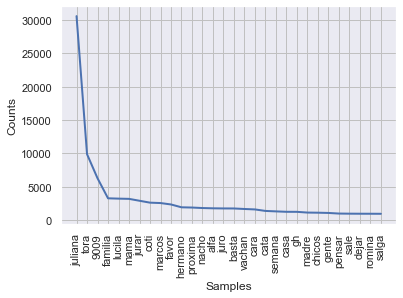

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [176]:
# Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq_clean.plot(30, cumulative=False)

## <a id='4'>4. Procesamiento de Lenguaje Natural (NLP)</a>

###  __<a id='4a'>a. Análisis de Sentimientos</a>__

In [177]:
# Usando SIA del paquete NLTK
def busca_sent_con_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [178]:
sentimientos_con_SIA = tweets_df5['tidiest_tweets'].apply(lambda tweet: busca_sent_con_SIA(tweet))
pd.DataFrame(sentimientos_con_SIA.value_counts())

tidiest_tweets
pos           41223
neg            9140

In [179]:
tweets_df5['sentimiento'] = sentimientos_con_SIA
tweets_df5.head()

tidy_tweets                 fecha  \
0   qué bronca me da esto, cero consideración por...  2022/11/20, 19:10:10   
1  nacho contando que una de las productoras le d...  2022/11/20, 19:10:10   
2                        quiero que se vacha juliana  2022/11/20, 19:10:10   
3   ya sabemos que nacho es dolobu, chusma y jueg...  2022/11/20, 19:10:10   
4  que lo manden no más, afuera tiene aguante y o...  2022/11/20, 19:10:10   

   ignacio  lucila  walter  mora  maximiliano  constanza  maria laura  \
0        0       0       0     0            0          0            0   
1        1       0       0     0            0          0            0   
2        0       0       0     0            0          0            0   
3        1       0       0     0            0          0            0   
4        1       0       0     0            0          0            0   

   agustin  ...  thiago  romina  alexis  juliana  participante  \
0        0  ...       0       0       0        0        marcos   
1        0  ...       0       0       0        0       ignacio   
2        0  ...       0       0       0        1       juliana   
3        0  ...       0       0       0        0       ignacio   
4        0  ...       0       0       0        0       ignacio   

                                       tidier_tweets  \
0   qué bronca me da esto, cero consideración por...   
1  nacho contando que una de las productoras le d...   
2                        quiero que se vacha juliana   
3   ya sabemos que nacho es dolobu, chusma y jueg...   
4  que lo manden no más, afuera tiene aguante y o...   

                                      tidiest_tweets  \
0   qué bronca me da esto cero consideración por ...   
1  nacho contando que una de las productoras le d...   
2                        quiero que se vacha juliana   
3   ya sabemos que nacho es dolobu chusma y juega...   
4  que lo manden no más afuera tiene aguante y oj...   

                                     tidiest2_tweets  \
0   que bronca me da esto cero consideracion por ...   
1  nacho contando que una de las productoras le d...   
2                        quiero que se vacha juliana   
3   ya sabemos que nacho es dolobu chusma y juega...   
4  que lo manden no mas afuera tiene aguante y oj...   

                                           tokenized  sentimiento  
0  [que, bronca, me, da, esto, cero, consideracio...          pos  
1  [nacho, contando, que, una, de, las, productor...          pos  
2                  [quiero, que, se, vacha, juliana]          pos  
3  [ya, sabemos, que, nacho, es, dolobu, chusma, ...          neg  
4  [que, lo, manden, no, mas, afuera, tiene, agua...          neg  

[5 rows x 26 columns]

In [71]:
# Usando TextBlob
def tweet_sentiment(tweet):    
        
        analysis = TextBlob(tweet) 
        
        if analysis.sentiment.polarity > 0: 
            return 'positive'
#        elif analysis.sentiment.polarity == 0: 
#            return 'neutral'
        else: 
            return 'negative'

In [91]:
# tweets_df5['sentim_tweets'] = np.vectorize(tweet_sentiment)(tweets_df5['tidiest3_tweets'])

In [115]:
# tweets_df5['sentim_tweets'].value_counts()

negative    18276
positive      194
Name: sentim_tweets, dtype: int64

Dado que el sistema SIA toma más negativos que el Textblob, seguiremos el análisis con los resultados de SIA (`sentimiento`)

In [181]:
# Guardamos el df en el datalake raw
tweets_df5.to_csv('/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/raw/raw/twitter_token'+numero+'.csv')

In [184]:
now_f = datetime.now()

In [185]:
diff = now_f-now_i

In [186]:
# Convierte objeto timedelta a minutos
diff_in_minutes = diff.total_seconds() / 60
# Redondeo de minutos
diff_in_minutes = round(diff_in_minutes)
print("Tiempo total de procesamiento: {} Minutes".format(diff_in_minutes) )

Tiempo total de procesamiento: 0 Minutes


## Aclaración
Este notebook almacena los csv en el datalake local para ser trabajado con el notebook siguiente `Final_Diplo_v2`